# Libraries

In [148]:
import sys
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib.colors import ListedColormap
import scipy.stats as st
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pylab as pl
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Versions

In [149]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 23:26:10) 
[GCC 11.2.0]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Datasets

In [150]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")
twogaussians33_csv = pd.read_csv("data/twogaussians33.csv")
twogaussians42_csv = pd.read_csv("data/twogaussians42.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

X_twogaussians33 = twogaussians33_csv[['x1', 'x2']].values
y_twogaussians33 = twogaussians33_csv['label'].values

X_twogaussians42 = twogaussians42_csv[['x1', 'x2']].values
y_twogaussians42 = twogaussians42_csv['label'].values

In [151]:
circle_csv_0 = circle_csv[(circle_csv['label'] == 0)]
circle_csv_1 = circle_csv[(circle_csv['label'] == 1)]
cdf_circle_0 = circle_csv_0[['x1', 'x2']]
cdf_circle_1 = circle_csv_1[['x1', 'x2']]

spiral_csv_0 = spiral_csv[(spiral_csv['label'] == 0)]
spiral_csv_1 = spiral_csv[(spiral_csv['label'] == 1)]
cdf_spiral_0 = spiral_csv_0[['x', 'y']]
cdf_spiral_1 = spiral_csv_1[['x', 'y']]

moons_csv_0 = moons_csv[(moons_csv['label'] == 0)]
moons_csv_1 = moons_csv[(moons_csv['label'] == 1)]
moons_cdf_0 = moons_csv_0[['x1', 'x2']]
moons_cdf_1 = moons_csv_1[['x1', 'x2']]

halfkernel_csv_0 = halfkernel_csv[(halfkernel_csv['label'] == 0)]
halfkernel_csv_1 = halfkernel_csv[(halfkernel_csv['label'] == 1)]
halfkernel_cdf_0 = halfkernel_csv_0[['x1', 'x2']]
halfkernel_cdf_1 = halfkernel_csv_1[['x1', 'x2']]

twogaussians33_csv_0 = twogaussians33_csv[(twogaussians33_csv['label'] == 0)]
twogaussians33_csv_1 = twogaussians33_csv[(twogaussians33_csv['label'] == 1)]
twogaussians33_cdf_0 = twogaussians33_csv_0[['x1', 'x2']]
twogaussians33_cdf_1 = twogaussians33_csv_1[['x1', 'x2']]

twogaussians42_csv_0 = twogaussians42_csv[(twogaussians42_csv['label'] == 0)]
twogaussians42_csv_1 = twogaussians42_csv[(twogaussians42_csv['label'] == 1)]
twogaussians42_cdf_0 = twogaussians42_csv_0[['x1', 'x2']]
twogaussians42_cdf_1 = twogaussians42_csv_1[['x1', 'x2']]

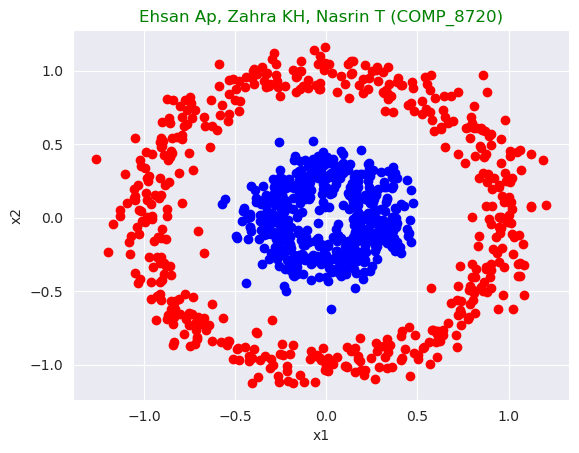

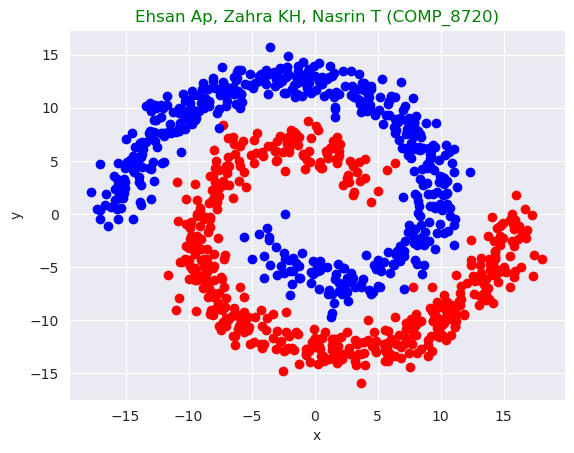

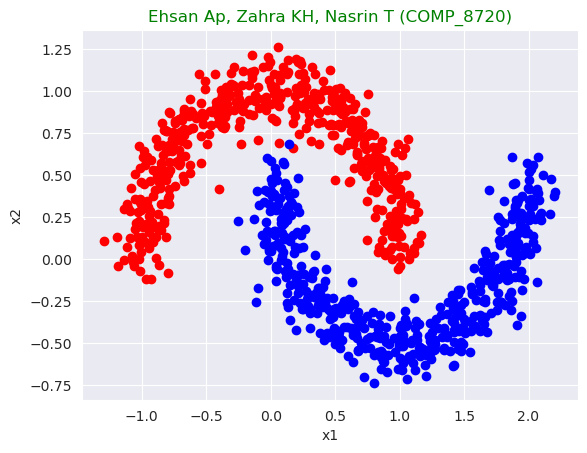

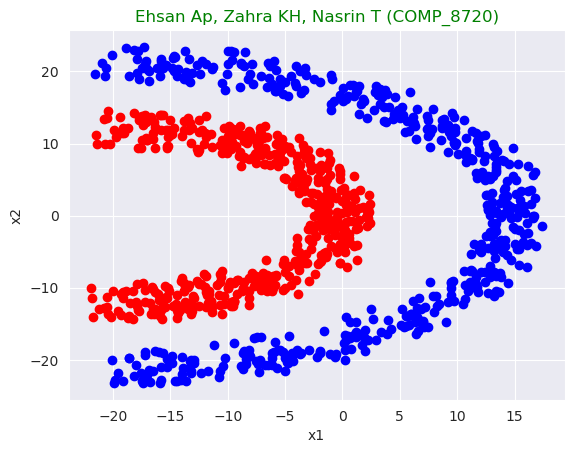

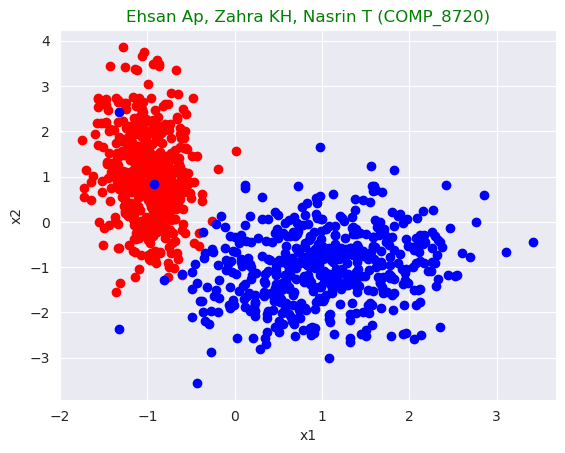

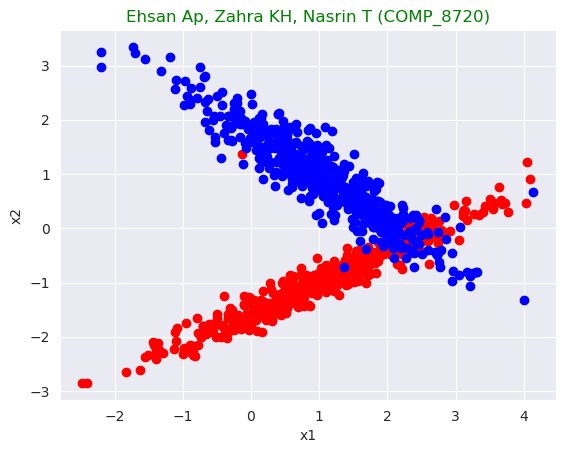

In [152]:
plt.scatter(cdf_circle_0.x1, cdf_circle_0.x2, color='red')
plt.scatter(cdf_circle_1.x1, cdf_circle_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(cdf_spiral_0.x, cdf_spiral_0.y, color='red')
plt.scatter(cdf_spiral_1.x, cdf_spiral_1.y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(moons_csv_0.x1, moons_csv_0.x2, color='red')
plt.scatter(moons_csv_1.x1, moons_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(halfkernel_csv_0.x1, halfkernel_csv_0.x2, color='red')
plt.scatter(halfkernel_csv_1.x1, halfkernel_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(twogaussians33_csv_0.x1, twogaussians33_csv_0.x2, color='red')
plt.scatter(twogaussians33_csv_1.x1, twogaussians33_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(twogaussians42_csv_0.x1, twogaussians42_csv_0.x2, color='red')
plt.scatter(twogaussians42_csv_1.x1, twogaussians42_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Generic Method

In [153]:
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'TN': cm[0, 0], 'FP': cm[0, 1], 'FN': cm[1, 0], 'TP': cm[1, 1]
        , 'PPV': np.divide(cm[1, 1], cm[1, 1] + cm[0, 1], where=cm[1, 1] + cm[0, 1] != 0)
        , 'NPV': np.divide(cm[0, 0], cm[0, 0] + cm[1, 0], where=cm[0, 0] + cm[1, 0] != 0)
        , 'Sensitivity': np.divide(cm[1, 1], cm[1, 1] + cm[1, 0], where=cm[1, 1] + cm[1, 0] != 0)
        , 'Specificity': np.divide(cm[0, 0], cm[0, 0] + cm[0, 1], where=cm[0, 0] + cm[0, 1] != 0)
        , 'Accuracy': np.divide(cm[1, 1] + cm[0, 0], cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1],
                                where=cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1] != 0)}

In [154]:
def print_performance_measurement(result):
    print(np.mean(result['test_PPV']))
    print(np.mean(result['test_NPV']))
    print(np.mean(result['test_Sensitivity']))
    print(np.mean(result['test_Specificity']))
    print(np.mean(result['test_Accuracy']))

In [155]:
def draw_two_d(model, X, y):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    clf = model
    clf.fit(X, y)

    h = .02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')

    plt.show()

In [156]:
def draw_acc_comparison(performance):
    dataSets = ('circles0.3', 'spiral', 'moons', 'halfkernel', 'twogaussians33', 'twogaussians42')
    y_pos = np.arange(len(dataSets))

    fig = plt.figure(figsize = (10, 5))

    plt.bar(dataSets, performance, color ='lightblue',width = 0.4)

    plt.xlabel("Datasets")
    plt.ylabel("Accuracy")
    plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
    plt.show()

# a. LDA (linear discriminant analysis)

In [157]:
linear_model = LinearDiscriminantAnalysis()

In [158]:
cv_results_circle = cross_validate(linear_model, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

0.460788506118705
0.45872276617409324
0.492
0.42800000000000005
0.4600000000000001


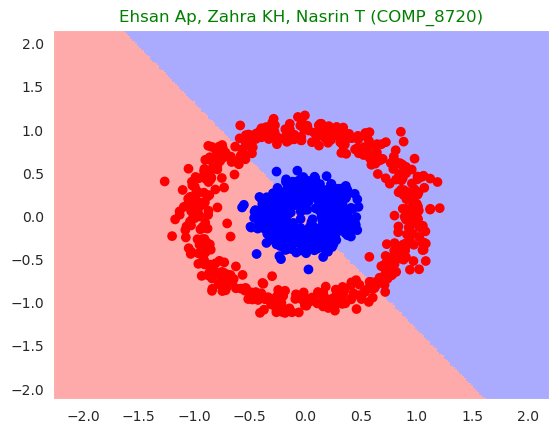

In [159]:
draw_two_d(linear_model, X_circle, y_circle)

In [160]:
cv_results_spiral = cross_validate(linear_model, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.7509154277040085
0.747500992952495
0.744
0.75
0.7470000000000001


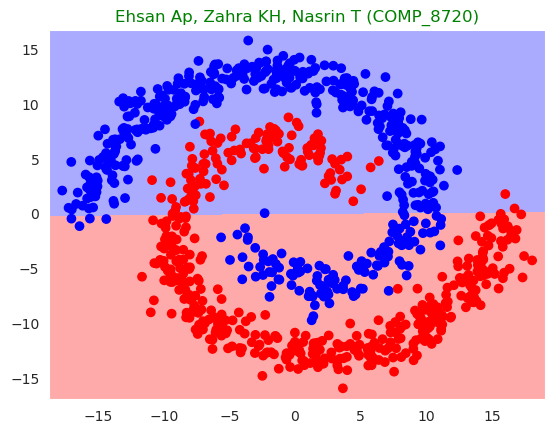

In [161]:
draw_two_d(linear_model, X_spiral, y_spiral)

In [162]:
cv_results_moons = cross_validate(linear_model, X_moons, y_moons, cv=10, scoring=confusion_matrix_scorer)
acc_moons = np.mean(cv_results_moons['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.885687941024746
0.8819805328781467
0.8799999999999999
0.8859999999999999
0.883


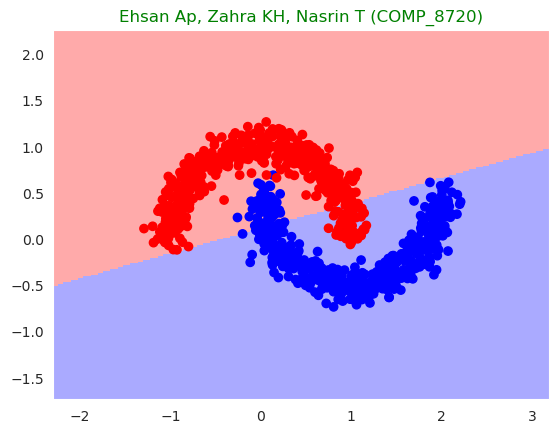

In [163]:
draw_two_d(linear_model, X_moons, y_moons)

In [164]:
cv_results_halfkernel = cross_validate(linear_model, X_halfkernel, y_halfkernel, cv=10, scoring=confusion_matrix_scorer)
acc_halfkernel = np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_halfkernel)

0.6844611250514365
0.6612348553433639
0.6439999999999999
0.696
0.67


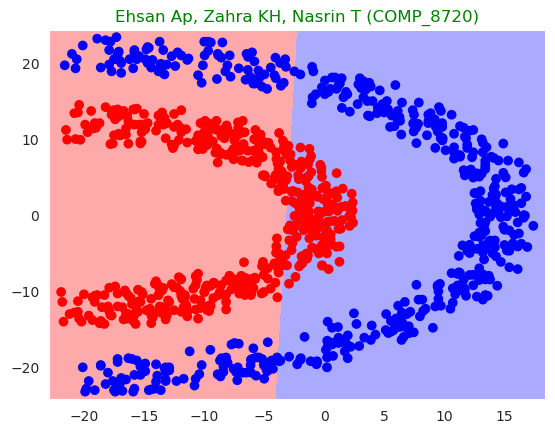

In [165]:
draw_two_d(linear_model, X_halfkernel, y_halfkernel)

In [166]:
cv_results_twogaussians33 = cross_validate(linear_model, X_twogaussians33, y_twogaussians33, cv=10,
                                           scoring=confusion_matrix_scorer)
acc_twogaussians33 = np.mean(cv_results_twogaussians33['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians33)

1.0
0.9713183389143433
0.970078431372549
1.0
0.985


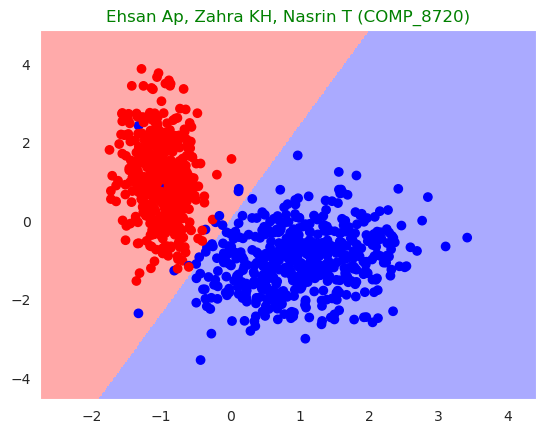

In [167]:
draw_two_d(linear_model, X_twogaussians33, y_twogaussians33)

In [168]:
cv_results_twogaussians42 = cross_validate(linear_model, X_twogaussians42, y_twogaussians42, cv=10,
                                           scoring=confusion_matrix_scorer)
acc_twogaussians42 = np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.9273553366290873
0.8812098346485536
0.8737959183673469
0.9301176470588235
0.9019999999999999


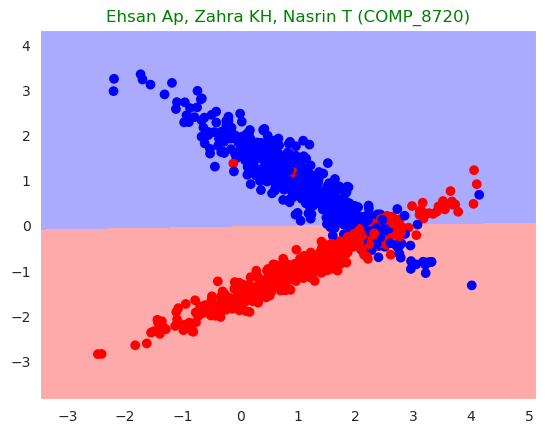

In [169]:
draw_two_d(linear_model, X_twogaussians42, y_twogaussians42)

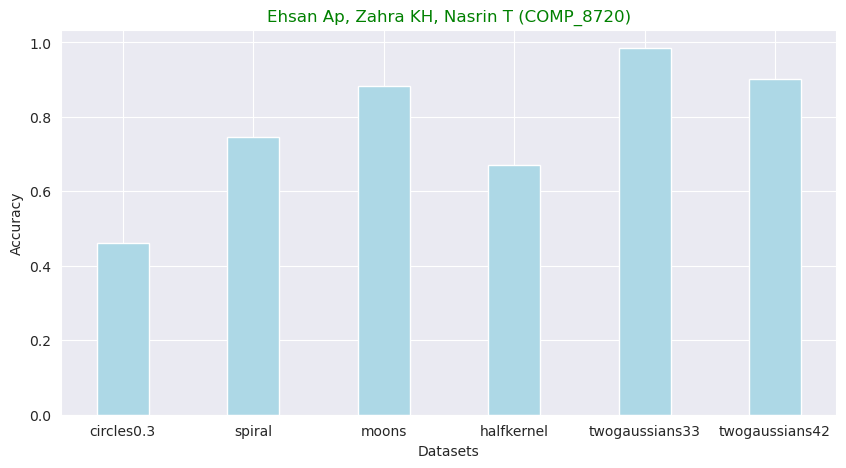

In [170]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians33,acc_twogaussians42))

# b. Quadratic (quadratic discriminant analysis)

In [171]:
quadratic = QuadraticDiscriminantAnalysis()

In [172]:
cv_results_circle = cross_validate(quadratic, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

1.0
0.9813271449231493
0.9799999999999999
1.0
0.99


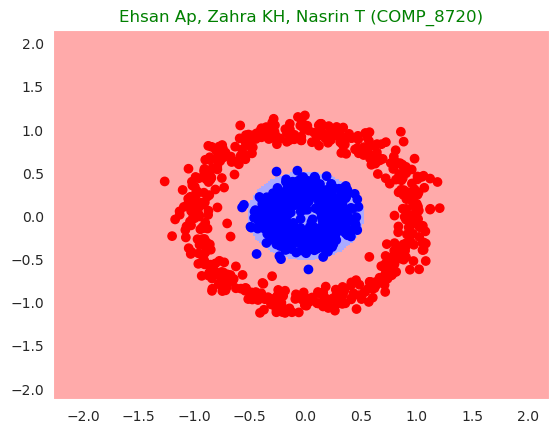

In [173]:
draw_two_d(quadratic, X_circle, y_circle)

In [174]:
cv_results_spiral = cross_validate(quadratic, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.749783403699644
0.748231044424891
0.746
0.748
0.7470000000000001


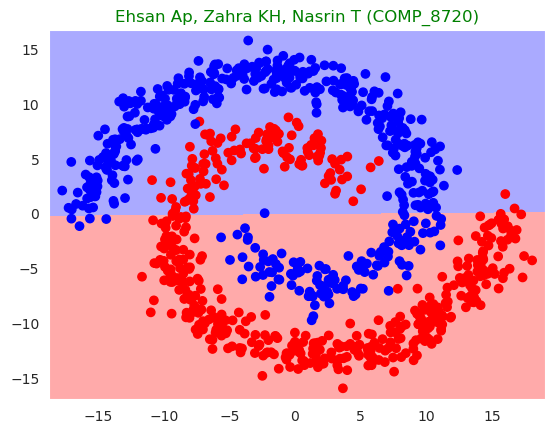

In [175]:
draw_two_d(quadratic, X_spiral, y_spiral)

In [176]:
cv_results_moons = cross_validate(quadratic, X_moons, y_moons, cv=10, scoring=confusion_matrix_scorer)
acc_moons = np.mean(cv_results_moons['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.8857797108347135
0.8801725540106105
0.8779999999999999
0.8860000000000001
0.882


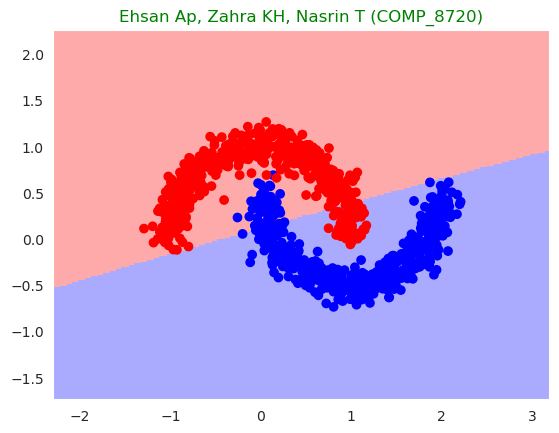

In [177]:
draw_two_d(quadratic, X_moons, y_moons)

In [178]:
cv_results_halfkernel = cross_validate(quadratic, X_moons, y_moons, cv=10, scoring=confusion_matrix_scorer)
acc_halfkernel = np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.8857797108347135
0.8801725540106105
0.8779999999999999
0.8860000000000001
0.882


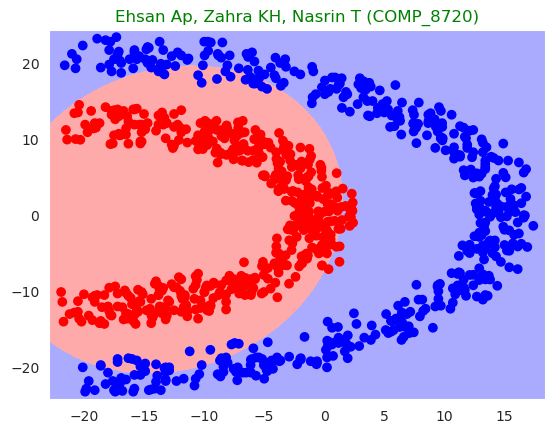

In [179]:
draw_two_d(quadratic, X_halfkernel, y_halfkernel)

In [180]:
cv_results_twogaussians33 = cross_validate(quadratic, X_twogaussians33, y_twogaussians33, cv=10,
                                           scoring=confusion_matrix_scorer)
acc_twogaussians33 = np.mean(cv_results_twogaussians33['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians33)

0.9941176470588236
0.9902322775263952
0.9900392156862745
0.9940000000000001
0.992


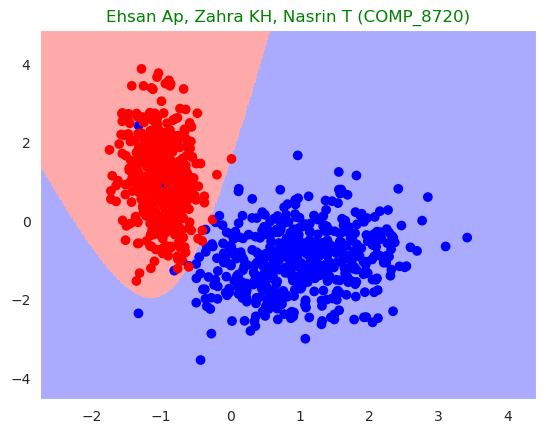

In [181]:
draw_two_d(quadratic, X_twogaussians33, y_twogaussians33)

In [182]:
cv_results_twogaussians42 = cross_validate(quadratic, X_twogaussians42, y_twogaussians42, cv=10,
                                           scoring=confusion_matrix_scorer)
acc_twogaussians42 = np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.9770206493945095
0.9272280962814851
0.9217142857142857
0.978
0.95


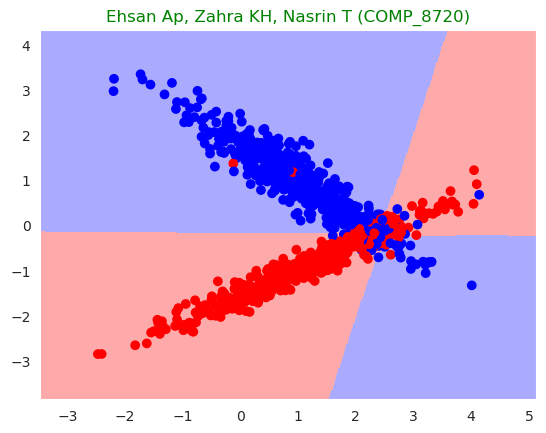

In [183]:
draw_two_d(quadratic, X_twogaussians42, y_twogaussians42)

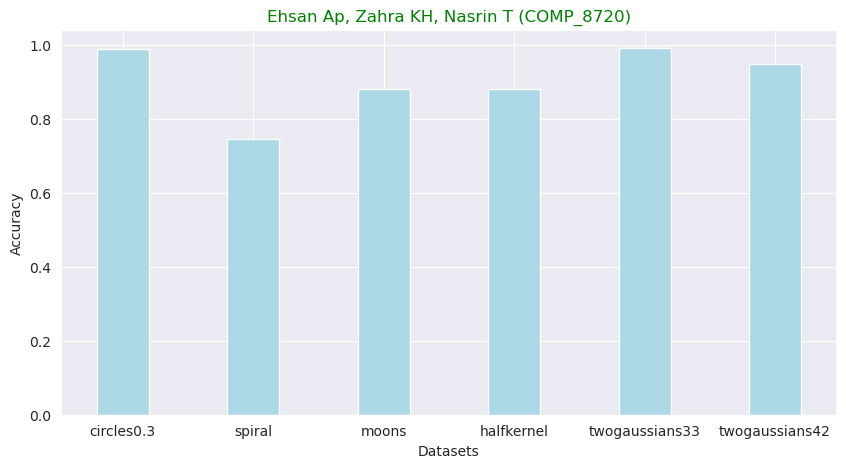

In [184]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians33,acc_twogaussians42))

# c. Naïve Bayes

In [185]:
naive_type = GaussianNB()

In [186]:
cv_results_circle = cross_validate(naive_type, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

1.0
0.9813271449231493
0.9799999999999999
1.0
0.99


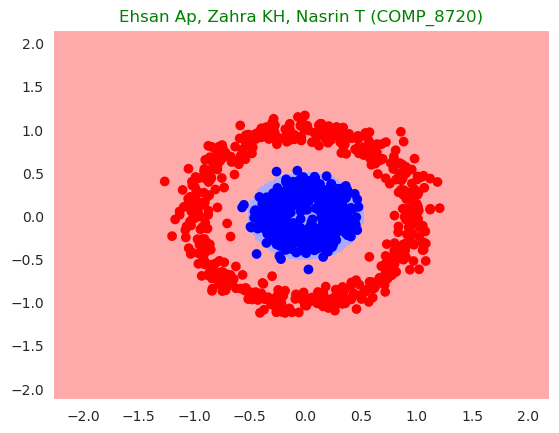

In [187]:
draw_two_d(naive_type, X_circle, y_circle)

In [188]:
cv_results_spiral = cross_validate(naive_type, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.7349519873725038
0.7346683350723482
0.732
0.734
0.733


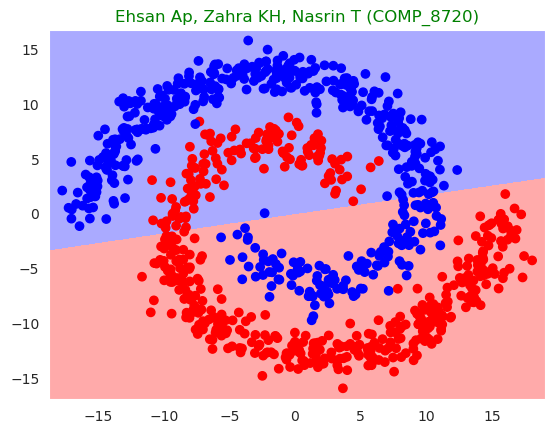

In [189]:
draw_two_d(naive_type, X_spiral, y_spiral)

In [190]:
cv_results_halfkernel = cross_validate(naive_type, X_halfkernel, y_halfkernel, cv=10,scoring=confusion_matrix_scorer)
acc_halfkernel=np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_halfkernel)

0.960576722178233
0.9276536297004032
0.924
0.9620000000000001
0.943


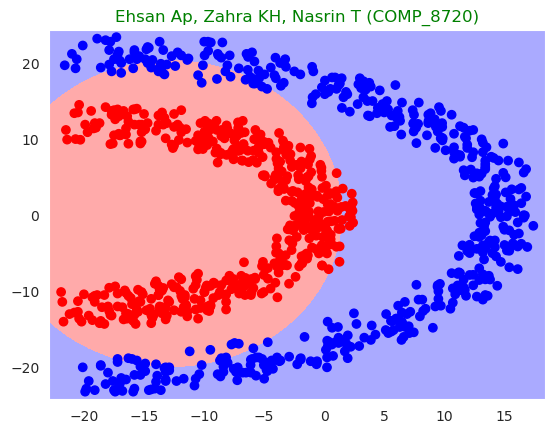

In [191]:
draw_two_d(naive_type,X_halfkernel,y_halfkernel)

In [192]:
cv_results_twogaussians33 = cross_validate(naive_type, X_twogaussians33, y_twogaussians33, cv=10,scoring=confusion_matrix_scorer)
acc_twogaussians33=np.mean(cv_results_twogaussians33['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians33)

0.9882714932126697
0.9920376150460184
0.9920392156862745
0.9879591836734694
0.99


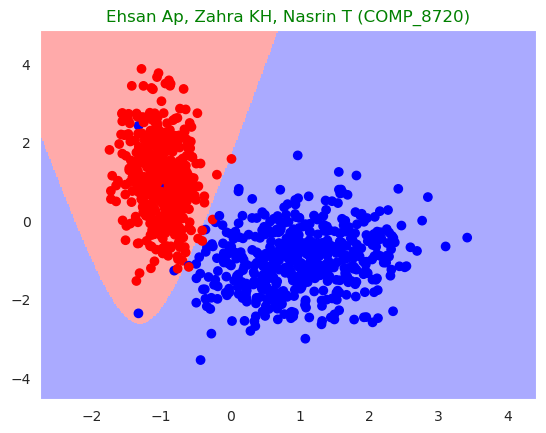

In [193]:
draw_two_d(naive_type,X_twogaussians33,y_twogaussians33)

In [194]:
cv_results_twogaussians42 = cross_validate(naive_type, X_twogaussians42, y_twogaussians42, cv=10,scoring=confusion_matrix_scorer)
acc_twogaussians42=np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.9240144556126492
0.8872312721543736
0.8817959183673469
0.9260784313725491
0.9039999999999999


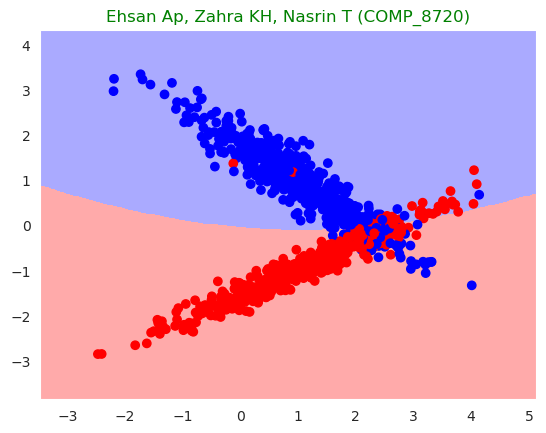

In [195]:
draw_two_d(naive_type,X_twogaussians42,y_twogaussians42)

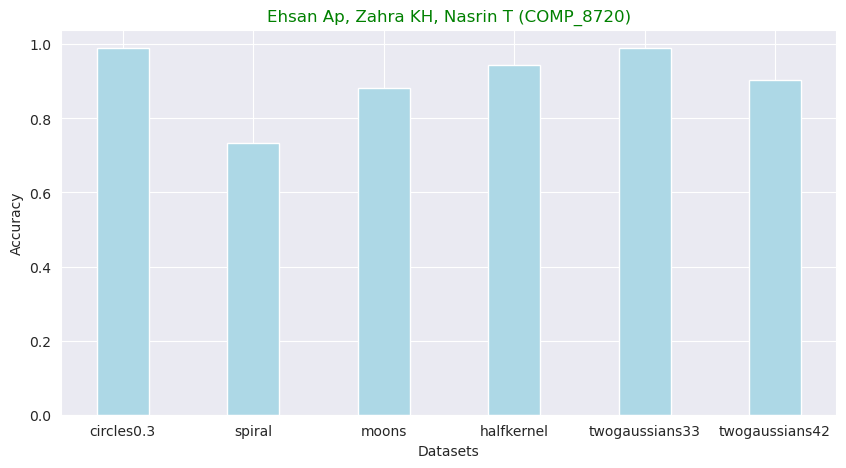

In [196]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians33,acc_twogaussians42))